In [2]:
## for data
import pandas as pd
import numpy as np

## for statistical test
import scipy

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# import time
# start_time = time.time()
# # main()
# print("--- %s seconds ---" % (time.time() - start_time))

In [3]:
## get time of a python program's execution

import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%Y-%m-%d %H:%M:%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    print(line)
    print(secondsToStr(), '-', s)
    if elapsed:
        print("Elapsed time:", elapsed)
    print(line)
    print()

def endlog():
    end = time()
    elapsed = end-start
    log("End Program", secondsToStr(elapsed))

start = time()
atexit.register(endlog)
log("Start Program")

2023-02-15 19:28:52 - Start Program



In [4]:
input_dict = pd.read_pickle("./input/gestures_4d_full.pkl")

In [5]:
print("type of input_dict:", type(input_dict))
print("keys:", input_dict.keys())

type of input_dict: <class 'dict'>
keys: dict_keys(['labels', 'data'])


In [6]:
print(type(input_dict['labels']))
print(type(input_dict['data']))

<class 'list'>
<class 'numpy.ndarray'>


In [7]:
print("shape of ndarray:", input_dict['data'].shape)

shape of ndarray: (7420, 120, 67, 3)


In [8]:
# defineing labels id's of left, right and both side

lefthand_idx = [2,5,8,18,20,23,26,29,31,33,35,37,39,41,44,52]
righthand_idx = [1,4,7,9,17,19,22,25,28,30,32,34,36,38,40,43]
bothhand_idx = [0,3,6,10,11,12,13,14,15,16,21,24,27,42,45,46,47,48,49,50,51]

labels = np.array(input_dict['labels'])
data = input_dict['data']

In [9]:
# creating mask for left right and both hands
# to filter the idx for each hands respectively 


mask = np.zeros_like(labels, dtype=bool)        # initialize mask with zeros
for id in lefthand_idx:
    maskid = labels == id
    mask = mask + maskid

lefthand_data = data[mask]
lefthand_labels = labels[mask]


mask = np.zeros_like(labels, dtype=bool)        # reset mask
for id in righthand_idx:
    maskid = labels == id
    mask = mask + maskid

righthand_data = data[mask]
righthand_labels = labels[mask]


mask = np.zeros_like(labels, dtype=bool)        # reset mask
for id in bothhand_idx:
    maskid = labels == id
    mask = mask + maskid

bothhand_data  = data[mask]
bothhand_labels = labels[mask]


In [10]:
print("lefthand_data shape:", lefthand_data.shape)
print("righthand_data shape:", righthand_data.shape)
print("bothhand_data shape:", bothhand_data.shape)

print("sum_data shape:", lefthand_data.shape[0] + righthand_data.shape[0] + bothhand_data.shape[0])

print("lefthand_labels shape:", lefthand_labels.shape)
print("righthand_labels shape:", righthand_labels.shape)
print("bothhand_labels shape:", bothhand_labels.shape)

lefthand_data shape: (2053, 120, 67, 3)
righthand_data shape: (2021, 120, 67, 3)
bothhand_data shape: (3346, 120, 67, 3)
sum_data shape: 7420
lefthand_labels shape: (2053,)
righthand_labels shape: (2021,)
bothhand_labels shape: (3346,)


In [11]:
# Defining labels into three-target-classes
# lefthand_labels = -1
# righthand_labels = 1
# bothhand_labels = 0

lefthand_target = np.ones_like(lefthand_labels) * -1
righthand_target = np.ones_like(righthand_labels)
bothhand_target = np.zeros_like(bothhand_labels)

print(lefthand_target.shape)
print(righthand_target.shape)
print(bothhand_target.shape)

(2053,)
(2021,)
(3346,)


In [12]:
all_labels = np.concatenate((lefthand_target, righthand_target, bothhand_target), axis=0)

all_data = np.concatenate((lefthand_data, righthand_data, bothhand_data), axis=0)

print(all_labels.shape)
print(all_data.shape)

(7420,)
(7420, 120, 67, 3)


In [13]:
from sklearn.model_selection import train_test_split

## split the data into tain test set: cross validation
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.30, random_state=21)

In [14]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(2226, 120, 67, 3)
(5194, 120, 67, 3)
(2226,)
(5194,)


In [15]:
## classification model take 2d array as input
## Reshape the 4-dimensional numpy array into a 2-dimensional numpy array

train_2d = train_data.reshape(train_data.shape[0], -1)
print("train data reshape dim:", train_2d.shape)

## Reshape the 4-d numpy-array into a 2-d numpy-array
test_2d = test_data.reshape(test_data.shape[0],-1)
print("test data reshape dim:", test_2d.shape)

train data reshape dim: (2226, 24120)
test data reshape dim: (5194, 24120)


### Supervisd learning Naive Bayes Gaussian 

In [16]:
from sklearn.naive_bayes import GaussianNB

## initlize our classifiers
naive_bayes = GaussianNB()

## train our classifier
nb_model_all = naive_bayes.fit(train_2d, train_labels)     # naive-bayes_model_all-data TRAIN MODEL   

In [18]:
# Make predictions on the test data
pred = naive_bayes.predict(test_2d)       # make prediction on test data using naive_bayes classifier

print(pred.shape)

(5194,)


In [19]:
## write a plotting function for confusion matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

score = accuracy_score(test_labels, pred)
print("accuracy:   %0.4f" % score)

cm = confusion_matrix(test_labels, pred)


accuracy:   0.9128


Confusion matrix, without normalization


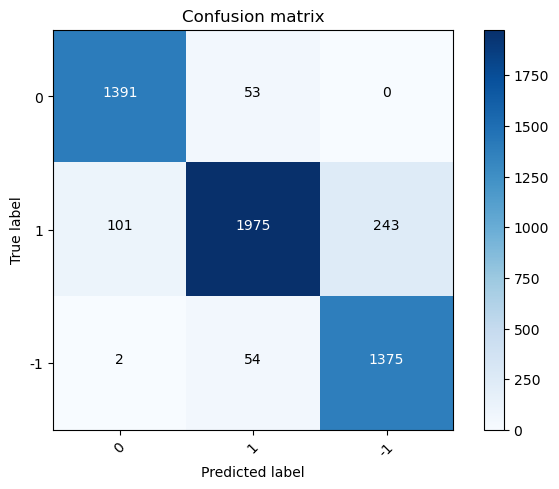

In [21]:
plot_confusion_matrix(cm, classes=['0', '1', '-1'])

TSNE for reducing dimention 

In [22]:
from sklearn.manifold import TSNE

# Load the data

## Define the t-SNE model
## n_components=3: This sets the number of dimensions of the output data to 3
## learning_rate=200: controls tradeoff between the accuracy and speed of the optimization algorithm
## perplexity=30: controls balance between local and global aspects of the data
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200)

# Fit the model to the data
train_tsne = tsne.fit_transform(train_2d)
test_tsne = tsne.fit_transform(test_2d)


In [23]:
print(train_tsne.shape)
print(test_tsne.shape)

(2226, 3)
(5194, 3)


In [24]:
from sklearn.naive_bayes import GaussianNB

## initlize our classifiers
naive_bayes = GaussianNB()

## train our classifier
nb_model_all = naive_bayes.fit(train_tsne, train_labels)     # naive-bayes_model_all-data TRAIN MODEL   

In [26]:
## Make predictions
pred2 = naive_bayes.predict(test_tsne)       # make prediction on test data using naive_bayes classifier

print(pred2.shape)

(5194,)


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

score = accuracy_score(test_labels, preds2)
print("accuracy:   %0.4f" % score)

cm = confusion_matrix(test_labels, preds2)


accuracy:   0.9680


Confusion matrix, without normalization


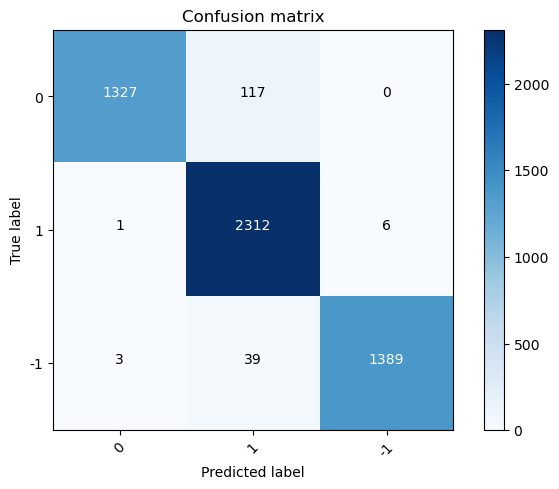

In [28]:
plot_confusion_matrix(cm, classes=[0,1,-1])

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

naive_bayes = GaussianNB()
# svc = SVC(kernel="rbf", gamma=0.001)

In [30]:
all_data_2d = all_data.reshape(all_data.shape[0], -1)
print(all_data_2d.shape)

(7420, 24120)


In [31]:
from sklearn.manifold import TSNE

# Load the data

## Define the t-SNE model
## n_components=3: This sets the number of dimensions of the output data to 3
## learning_rate=200: controls tradeoff between the accuracy and speed of the optimization algorithm
## perplexity=30: controls balance between local and global aspects of the data
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200)

# Fit the model to the data
all_data_tsne = tsne.fit_transform(all_data_2d)


In [32]:
all_data_tsne.shape

(7420, 3)

Learning Curve

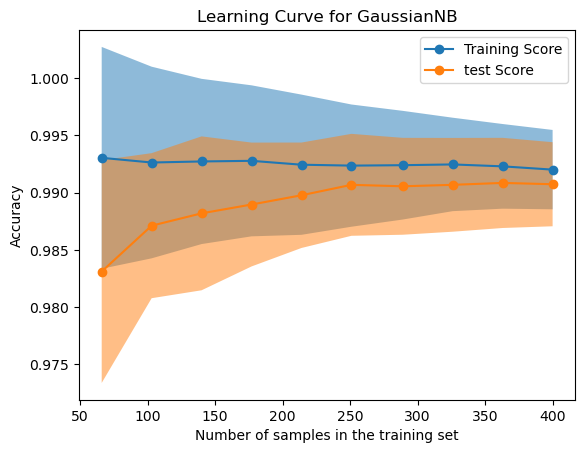

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
fig, ax = plt.subplots()

common_params = {
    "X": train_tsne,
    "y": train_labels,
    "train_sizes": np.linspace(0.1, 0.6, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.7, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")